## House Price Project

## Imports

In [333]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Reading Data

In [334]:
df = pd.read_csv("data.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Filtering & Removing Nonstandard Records

In [335]:
df = df[df["Address"].notna() & df["Address"].astype(str) != ""] # Remove Records with Invalid Addresses
df["Cleaned_Address"] = df["Address"].astype(str).str.strip().str.lower() # Add new column

df["Area"] = df["Area"].astype(str).replace(r"[^\d.]", "", regex=True) # Remove nonnumeric characters from Areas
df["Area"] = pd.to_numeric(df["Area"])                                 # Convert String Areas to Number
df = df[(df["Area"] >= 30) & (df["Area"] <= 500)]                      # Filter Records Based on Area

## Coding Data

In [336]:
address_mean_price = df.groupby(("Cleaned_Address"))["Price"].mean() # Getting average price of the addresses
address_mean_price_usd = df.groupby(("Cleaned_Address"))["Price(USD)"].mean()

df["Address_Mean_Price"] = df["Cleaned_Address"].map(address_mean_price) # Creating mean price column
df["Address_Mean_Price(USD)"] = df["Cleaned_Address"].map(address_mean_price_usd)

for col in df.columns:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)

df.to_csv("cleaned_data.csv")

## Reading Cleaned Data

In [337]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,Unnamed: 0,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Cleaned_Address,Address_Mean_Price,Address_Mean_Price(USD)
0,0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,shahran,2.985754e+09,99525.128692
1,1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,shahran,2.985754e+09,99525.128692
2,2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,pardis,7.778219e+08,25927.397329
3,3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,shahrake qods,9.009217e+08,30030.724638
4,4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,shahrake gharb,1.196988e+10,398996.045085


## Plots

Text(0, 0.5, 'Price(USD)')

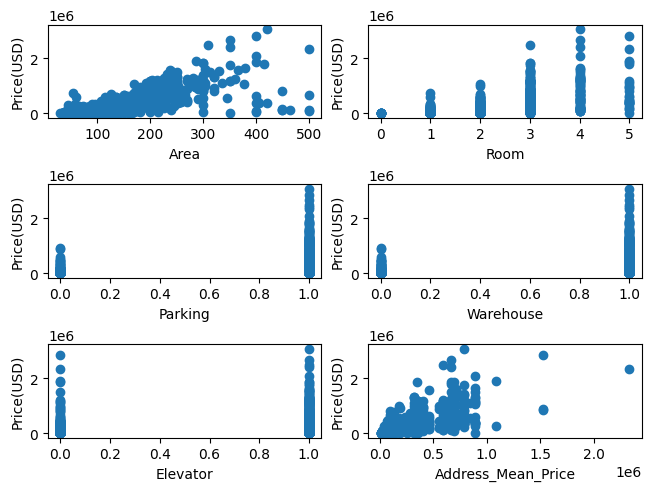

In [338]:
figure, axes = plt.subplots(3, 2, constrained_layout=True)

axes[0, 0].scatter(df["Area"], df["Price(USD)"])
axes[0, 0].set_xlabel("Area")
axes[0, 0].set_ylabel("Price(USD)")

axes[0, 1].scatter(df["Room"], df["Price(USD)"])
axes[0, 1].set_xlabel("Room")
axes[0, 1].set_ylabel("Price(USD)")

axes[1, 0].scatter(df["Parking"], df["Price(USD)"])
axes[1, 0].set_xlabel("Parking")
axes[1, 0].set_ylabel("Price(USD)")

axes[1, 1].scatter(df["Warehouse"], df["Price(USD)"])
axes[1, 1].set_xlabel("Warehouse")
axes[1, 1].set_ylabel("Price(USD)")

axes[2, 0].scatter(df["Elevator"], df["Price(USD)"])
axes[2, 0].set_xlabel("Elevator")
axes[2, 0].set_ylabel("Price(USD)")

axes[2, 1].scatter(df["Address_Mean_Price(USD)"], df["Price(USD)"])
axes[2, 1].set_xlabel("Address_Mean_Price")
axes[2, 1].set_ylabel("Price(USD)")


## Masking

In [339]:
mask = np.random.rand(len(df)) < 0.8
test_data = df[~mask]
train_data = df[mask]

## Linear Regression

In [340]:
from sklearn import linear_model
from sklearn.metrics import r2_score

features = ["Area", "Room", "Parking", "Warehouse", "Elevator", "Address_Mean_Price", "Address_Mean_Price(USD)"]
target = "Price(USD)" # "Price" or "Price(USD)"

independent_train_data = train_data[features]
dependent_train_data = train_data[target]
train_x = np.asanyarray(independent_train_data)
train_y = np.asanyarray(dependent_train_data).reshape(-1, 1)

independent_test_data = test_data[features]
dependent_test_data = test_data[target]
test_x = np.asanyarray(independent_test_data)
test_y = np.asanyarray(dependent_test_data).reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

predicted_y = reg.predict(test_x)

print(f"R-Score (between 0 and 1, 1 is ideal): {reg.score(test_x, test_y)}")
print(f"R2-Score (between 0 and 1, 1 is ideal): {r2_score(test_y, predicted_y)}")


R-Score (between 0 and 1, 1 is ideal): 0.6951399849738504
R2-Score (between 0 and 1, 1 is ideal): 0.6951399849738504


## Polynomial Regression (More Precise)

### Preprocessing Data

In [341]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.transform(test_x)

### Regression

In [342]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
reg.fit(train_x_poly, train_y)

predicted_y = reg.predict(test_x_poly)

print(f"R-Score (between 0 and 1, 1 is ideal): {reg.score(test_x_poly, test_y)}")
print(f"R2-Score (between 0 and 1, 1 is ideal): {r2_score(test_y, predicted_y)}")

R-Score (between 0 and 1, 1 is ideal): 0.7987986912615579
R2-Score (between 0 and 1, 1 is ideal): 0.7987986912615579


## Test Your Own Data

In [365]:
Area = 67
Room = 2
Parking = True
Warehouse = True
Elevator = False
Address = "West Ferdows Boulevard"

new_record = {
    "Area": [Area],
    "Room": [Room],
    "Parking": [Parking],
    "Warehouse": [Warehouse],
    "Elevator": [Elevator],
    "Address": [Address]
}

new_df = pd.DataFrame(new_record)

new_df["Cleaned_Address"] = new_df["Address"].astype(str).str.strip().str.lower()

new_df["Address_Mean_Price"] = new_df["Cleaned_Address"].map(address_mean_price)
new_df["Address_Mean_Price(USD)"] = new_df["Cleaned_Address"].map(address_mean_price_usd)

new_df["Area"] = pd.to_numeric(new_df["Area"])  

for col in new_df.columns:
    if new_df[col].dtype == "bool":
        new_df[col] = new_df[col].astype(int)


x = np.asanyarray(new_df[features])
x_poly_data = poly.transform(x)

predicted_price = reg.predict(x_poly_data)
price_unit = "$" if target == "Price(USD)" else "Toman"

print("------------ Price Prediction for Property ------------")
print(f"Features Used: Area={Area}, Room={Room}, Address='{Address}'")
print(f"The predicted price is: {predicted_price[0][0].round()}$")
print("-------------------------------------------------------")

------------ Price Prediction for Property ------------
Features Used: Area=67, Room=2, Address='West Ferdows Boulevard'
The predicted price is: 69924.0$
-------------------------------------------------------
